In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from astropy import units as u
from matplotlib.ticker import LogLocator, ScalarFormatter

from plato.instrument.detection import DetectionModel
from plato.stars import filter_valid_targets
from plato.visualisation import FigureProcessor, get_palette, set_plot_defaults

In [2]:
set_plot_defaults()

figure_directory = f"../figures/05_detection_efficiency/"
save = True

In [3]:
LOPS2 = pd.read_csv(f"../data/processed/LOPS2_targets.csv")
LOPN1 = pd.read_csv(f"../data/processed/LOPN1_targets.csv")

fields = pd.concat([LOPS2, LOPN1])
fields = filter_valid_targets(fields)

## PLOT EXAMPLE DETECTION EFFICIENCY

In [4]:
# calculate detection efficies on a grid of r_planet and porb
n = 1000

r_planet = np.linspace(0.3, 1.2, n) * u.Rearth
porb = np.geomspace(1, 2 * 365, n) * u.day

r_planet, porb = np.meshgrid(r_planet, porb)

data = pd.DataFrame(
    list(zip(r_planet.ravel().value, porb.ravel().value)),  # type: ignore
    columns=["R_planet", "P_orb"],
)

data["R_star"] = 1
data["M_star"] = 1
data["Magnitude_V"] = 12
data["n_cameras"] = 24
data["cos_i"] = 0
data["sigma_star"] = 1e-6
data["u1"] = 0.4
data["u2"] = 0.15

data["Detection Efficiency"] = DetectionModel().detection_efficiency(data)
detection_efficiency = data["Detection Efficiency"].values.reshape(n, n)  # type: ignore

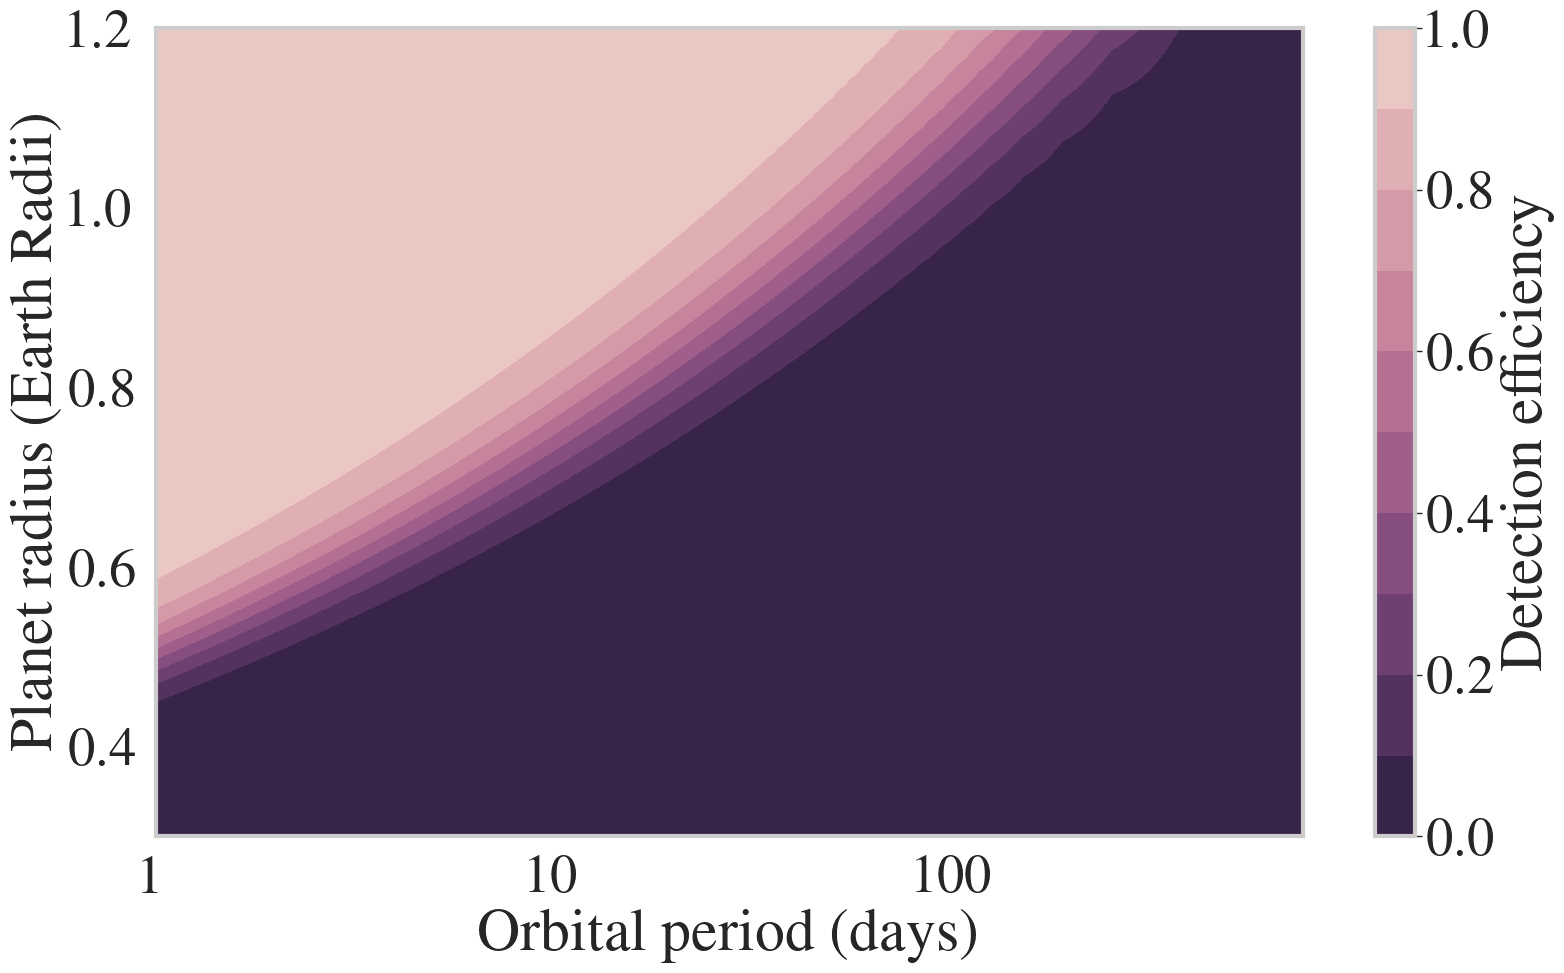

In [5]:
fig, ax = plt.subplots()

contour = ax.contourf(
    porb,
    r_planet,
    detection_efficiency,
    levels=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    cmap=get_palette(n_colors=10, as_cmap=True, reverse=True),  # Set the color map
)

ax.set_xscale("log")

ax.tick_params(axis="both", which="major", length=10, width=3)
ax.tick_params(axis="both", which="minor", length=6, width=2)

ax.xaxis.set_major_locator(LogLocator())
ax.xaxis.set_major_formatter(ScalarFormatter())

ax.set_xlabel("Orbital period (days)")
ax.set_ylabel(r"Planet radius (Earth Radii)")

# Add colorbar
cbar = fig.colorbar(contour)
cbar.set_label("Detection efficiency")

FigureProcessor(fig).save(
    "detection_efficiency_contour.pdf",
    figure_directory=figure_directory,
    save=save,
)

## PLOT DETECTION EFFICIENCY FOR FIELD TARGETS

In [7]:
halo = fields[fields["Population"] == "Halo"].rename(
    columns={"Radius": "R_star", "Mass": "M_star", "gaiaV": "Magnitude_V"}
)
halo["sigma_star"] = 1e-6
halo["cos_i"] = 0

# calculate detection efficies on a grid of r_planet and porb
n = 100

r_planet = np.linspace(0.3, 1.2, n) * u.Rearth
porb = np.geomspace(1, 2 * 365, n) * u.day

r_planet, porb = np.meshgrid(r_planet, porb)

data = pd.DataFrame(
    list(zip(r_planet.ravel().value, porb.ravel().value)),  # type: ignore
    columns=["R_planet", "P_orb"],
)

effs = []
for _, column in data.iterrows():
    print(_)
    target = halo.copy()
    target["R_planet"] = column["R_planet"]
    target["P_orb"] = column["P_orb"]
    detection_efficiency = DetectionModel().detection_efficiency(target).mean()
    effs.append(detection_efficiency)

effs = np.array(effs).reshape(n, n)

0
/home/chris/Documents/Projects/plato/plato/planets/transit.py:150: RuntimeWarning: invalid value encountered in arcsin
  t_transit = porb / np.pi * np.arcsin(outer_term)

1
/home/chris/Documents/Projects/plato/plato/planets/transit.py:150: RuntimeWarning: invalid value encountered in arcsin
  t_transit = porb / np.pi * np.arcsin(outer_term)

2
/home/chris/Documents/Projects/plato/plato/planets/transit.py:150: RuntimeWarning: invalid value encountered in arcsin
  t_transit = porb / np.pi * np.arcsin(outer_term)

3
/home/chris/Documents/Projects/plato/plato/planets/transit.py:150: RuntimeWarning: invalid value encountered in arcsin
  t_transit = porb / np.pi * np.arcsin(outer_term)

4
/home/chris/Documents/Projects/plato/plato/planets/transit.py:150: RuntimeWarning: invalid value encountered in arcsin
  t_transit = porb / np.pi * np.arcsin(outer_term)

5
/home/chris/Documents/Projects/plato/plato/planets/transit.py:150: RuntimeWarning: invalid value encountered in arcsin
  t_transit = 

NameError: name 'effs' is not defined

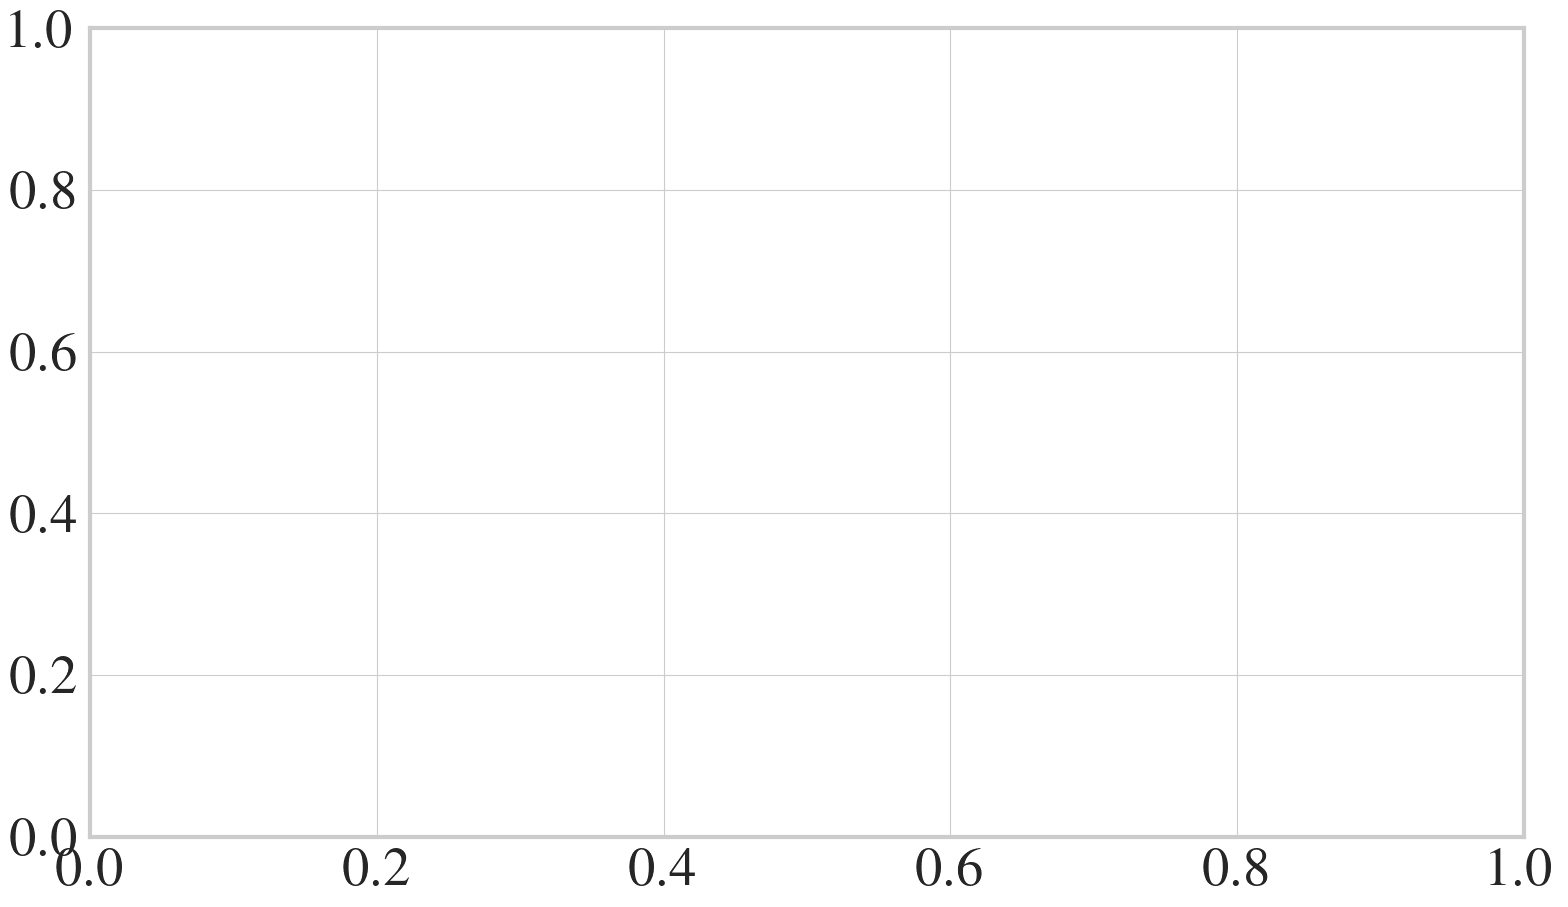

In [ ]:
fig, ax = plt.subplots()

contour = ax.contourf(
    porb,
    r_planet,
    effs,
    levels=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    cmap=get_palette(n_colors=10, as_cmap=True, reverse=True),  # Set the color map
)

ax.set_xscale("log")

ax.tick_params(axis="both", which="major", length=10, width=3)
ax.tick_params(axis="both", which="minor", length=6, width=2)

ax.xaxis.set_major_locator(LogLocator())
ax.xaxis.set_major_formatter(ScalarFormatter())

ax.set_xlabel("Orbital period (days)")
ax.set_ylabel(r"Planet radius (Earth Radii)")

# Add colorbar
cbar = fig.colorbar(contour)
cbar.set_label("Detection efficiency")